# Подготовка исходных данных

#### Загрузка исходного датафрейма 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams 
from statsmodels.nonparametric.smoothers_lowess import lowess

In [2]:
# Примените магическую функцию %matplotlib inline для
# отображения графиков в Jupyter Notebook и
# настройки конфигурации ноутбука со значением 'svg' для
# более четкого отображения графиков.

#%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv('IMDB.csv')
data = df.copy()
data.head(1000)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [7]:
data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


# Анализируем данные

### Гистограмма распределения рейтинга среди фильмов

Text(0, 0.5, 'films')

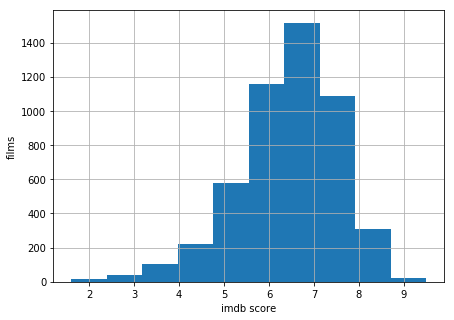

In [8]:
rcParams['figure.figsize'] = 7, 5
data['imdb_score'].hist()
plt.xlabel('imdb score')
plt.ylabel('films')

### Количество фильмов по странам

In [9]:
data['country'].value_counts().head()

USA        3807
UK          448
France      154
Canada      126
Germany      97
Name: country, dtype: int64

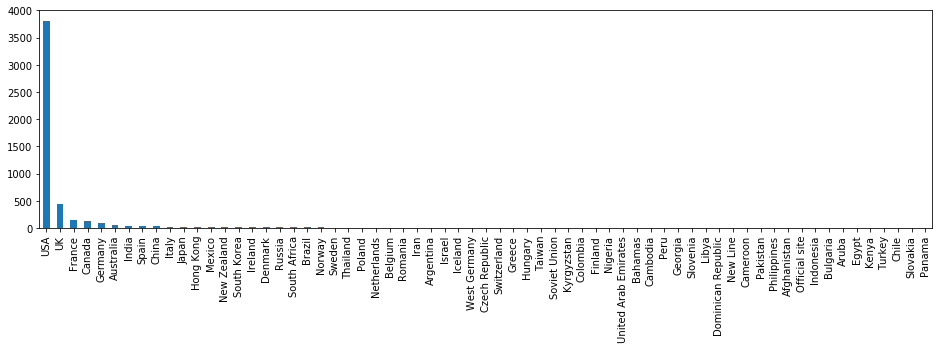

In [10]:
rcParams['figure.figsize'] = 16, 4
country_series = data['country'].value_counts()
country_series.plot('bar')
plt.show()

### Исследование бюджета от года выпуска

In [11]:
# Есть Nan среди title_year
data['title_year'].head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4       NaN
Name: title_year, dtype: float64

In [12]:
# Заменяем пропущенные значения средними
data['title_year'] = data['title_year'].fillna(data['title_year'].mean())

In [13]:
# Есть Nan среди budget
data['budget'].head()

0    237000000.0
1    300000000.0
2    245000000.0
3    250000000.0
4            NaN
Name: budget, dtype: float64

In [14]:
# Убираем NaN
# 
#data['budget'] = data['budget'].fillna(data['budget'].mean())
# Лучше заменять средними по каждому году, чтобы скачков не было, а то среднее значение по всей выборке большое

# Вычисляем средний бюджет по каждому году
series_title_budget = data.groupby('title_year')['budget'].mean()
# Делаем из Series Data Frame
df_title_budget = pd.DataFrame(series_title_budget)
# Переименовываем столбец
df_title_budget = df_title_budget.rename(columns={'budget': 'mean_budget_at_year'})
df_title_budget.head()

,mean_budget_at_year
title_year,
1916.0,385907.0
1920.0,100000.0
1925.0,245000.0
1927.0,6000000.0
1929.0,379000.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [16]:
# Делаем слияние Data Frame'ов в data1
data1 = pd.merge(data, df_title_budget, on='title_year', how='left')
data1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,mean_budget_at_year
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.000000,936.0,7.9,1.78,33000,3.707329e+07
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.000000,5000.0,7.1,2.35,0,3.511748e+07
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.000000,393.0,6.8,2.35,85000,3.829978e+07
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.000000,23000.0,8.5,2.35,164000,4.114327e+07
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,2002.470517,12.0,7.1,NaN,0,8.150000e+06


In [17]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.000000,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.000000,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.000000,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.000000,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,2002.470517,12.0,7.1,NaN,0


In [18]:
# Заполняем пропущенные значения средними по году
data1['budget'].fillna(data1['mean_budget_at_year'], inplace = True)
data1.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,mean_budget_at_year
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000.0,2009.000000,936.0,7.9,1.78,33000,3.707329e+07
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000.0,2007.000000,5000.0,7.1,2.35,0,3.511748e+07
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000.0,2015.000000,393.0,6.8,2.35,85000,3.829978e+07
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000.0,2012.000000,23000.0,8.5,2.35,164000,4.114327e+07
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,8150000.0,2002.470517,12.0,7.1,NaN,0,8.150000e+06


In [19]:
# Количество NaN в исходном = 492
data['budget'].isnull().value_counts()

False    4551
True      492
Name: budget, dtype: int64

In [20]:
# Количество заполненных в data1 (не NaN) равно 492 => все NaN'ы заменены
(data1['budget'] == data['budget']).value_counts()

True     4551
False     492
Name: budget, dtype: int64

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 29 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

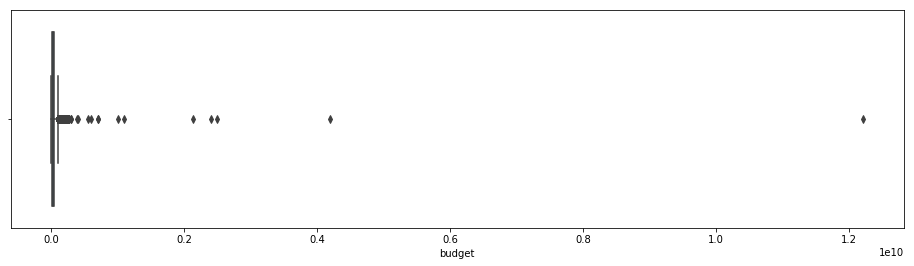

In [22]:
# Слишком много выбросов по бюджету
sns.boxplot(data1['budget'])

In [23]:
# Сортируем по бюджету и выводим также название фильма
(data1.sort_values(['budget'], ascending=[False]))[['budget','movie_title']].head(15)

,budget,movie_title
2988,1.221550e+10,The Host
3859,4.200000e+09,Lady Vengeance
3005,2.500000e+09,Fateless
2323,2.400000e+09,Princess Mononoke
2334,2.127520e+09,Steamboy
3423,1.100000e+09,Akira
4542,1.000000e+09,Godzilla 2000
3075,7.000000e+08,Kabhi Alvida Naa Kehna
3851,7.000000e+08,Tango
3273,6.000000e+08,Kites


In [24]:
# Все, что дороже 3*10^8 - выбросы, нужно приравнять их к средним за год

In [25]:
data1.loc[data1['budget']>3e8, 'budget'] = data1['mean_budget_at_year']

In [26]:
(data1.sort_values(['budget'], ascending=[False]))[['budget','movie_title']].head(10)

,budget,movie_title
1,300000000.0,Pirates of the Caribbean: At World's End
2740,300000000.0,Ong-bak 2
5,263700000.0,John Carter
7,260000000.0,Tangled
3461,258000000.0,Spider-Man 3
6,258000000.0,Spider-Man 3
27,250000000.0,Captain America: Civil War
18,250000000.0,Pirates of the Caribbean: On Stranger Tides
3,250000000.0,The Dark Knight Rises
8,250000000.0,Avengers: Age of Ultron


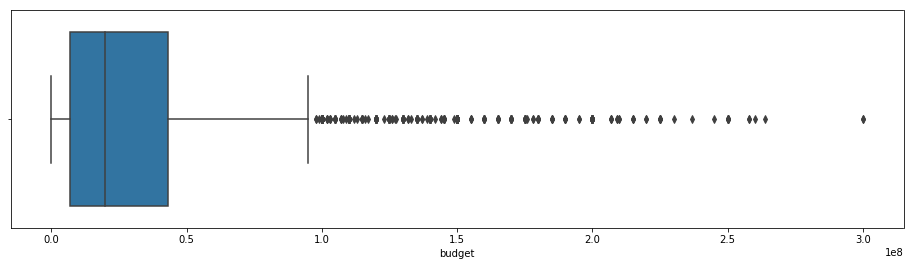

In [27]:
sns.boxplot(data1['budget'])

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RankWarning: Polyfit may be poorly conditioned
  


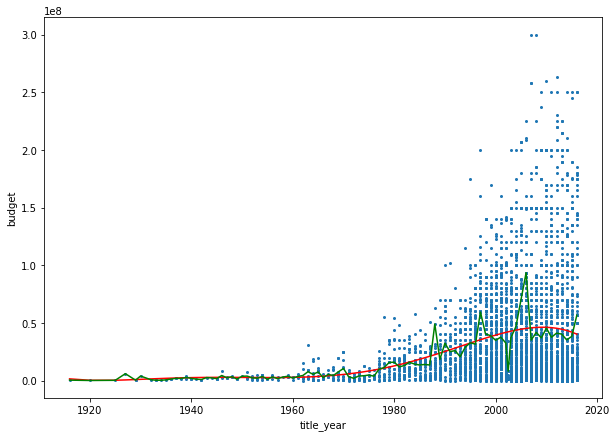

In [28]:
rcParams['figure.figsize'] = 10, 7
#plt.scatter(data1.loc[data1['budget']<1e8, 'title_year'], data1.loc[data1['budget']<1e8, 'budget'], s=4)
plt.scatter(data1['title_year'], data1['budget'], s=4)
plt.xlabel('title_year')
plt.ylabel('budget')

# Подбираем коэффициенты полинома
z = np.polyfit(series_title_budget.index, series_title_budget.values, 7)
# Формируем колином по коэффициентам
p = np.poly1d(z)
# Строим график полинома
plt.plot(series_title_budget.index,p(series_title_budget.index),"r-")
# Строим график по средним значениям по годам
plt.plot(series_title_budget, color = 'green')


### Исследование рейтинга IMDB от года выпуска

In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 29 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [30]:
# Вычисляем средний бюджет по каждому году
series_title_score = data.groupby('title_year')['imdb_score'].mean()
# Делаем из Series Data Frame
df_title_score = pd.DataFrame(series_title_score)
# Переименовываем столбец
df_title_score = df_title_score.rename(columns={'imdb_score': 'mean_imdb_score_at_year'})
df_title_score.tail()

,mean_imdb_score_at_year
title_year,
2012.0,6.266516
2013.0,6.369620
2014.0,6.228175
2015.0,6.033628
2016.0,6.399057


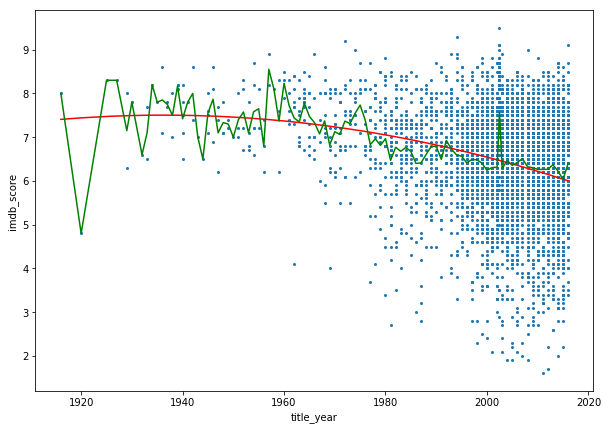

In [31]:
plt.scatter(data1['title_year'], data1['imdb_score'], s=4)
plt.xlabel('title_year')
plt.ylabel('imdb_score')

# Подбираем коэффициенты полинома
z = np.polyfit(series_title_score.index, series_title_score.values, 2)
# Формируем колином по коэффициентам
p = np.poly1d(z)
# Строим график полинома
plt.plot(series_title_score.index, p(series_title_score.index),"r-")
# Строим график по средним значениям по годам
plt.plot(series_title_score, color = 'green')




### Исследование рейтинга IMDB от страны

In [32]:
# Вычисляем средний рейтинг по каждой стране
series_score_country = data1.groupby('country')['imdb_score'].mean()
series_score_country.sort_values(inplace = True, ascending = False)
series_score_country.head()

country
Kyrgyzstan              8.7
Libya                   8.4
United Arab Emirates    8.2
Soviet Union            8.1
Egypt                   8.1
Name: imdb_score, dtype: float64

In [33]:
series_score_country_1 = series_score_country[0:8]
series_score_country_2 = series_score_country[8:16]
series_score_country_3 = series_score_country[16:24]
series_score_country_4 = series_score_country[24:32]
series_score_country_5 = series_score_country[32:40]
series_score_country_6 = series_score_country[40:48]
series_score_country_7 = series_score_country[48:56]
series_score_country_8 = series_score_country[56:65]

Text(0, 0.5, 'Средний рейтинг фильма')

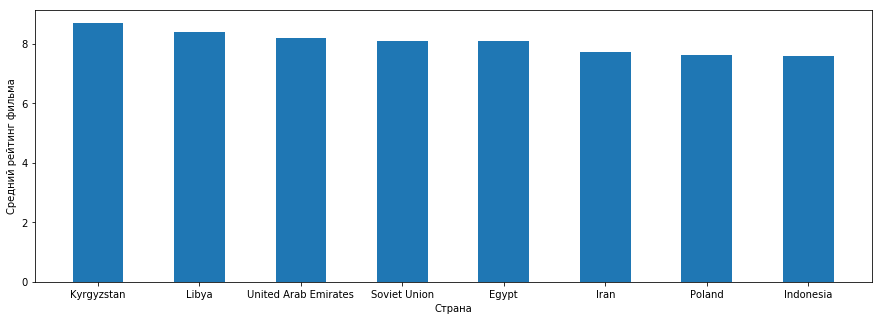

In [34]:
rcParams['figure.figsize'] = 15, 5
plt.bar(series_score_country_1.index, series_score_country_1.values, width = 0.5)
plt.xlabel('Страна')
plt.ylabel('Средний рейтинг фильма')

Text(0, 0.5, 'Средний рейтинг фильма')

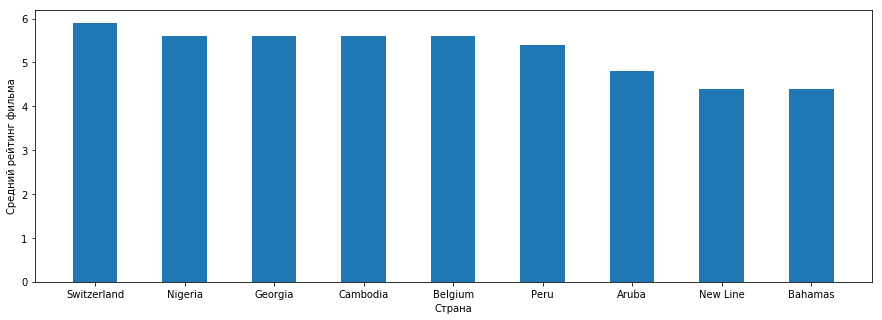

In [35]:
plt.bar(series_score_country_8.index, series_score_country_8.values, width = 0.5)
plt.xlabel('Страна')
plt.ylabel('Средний рейтинг фильма')

### Средний рейтинг фильма от жанра

In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043 entries, 0 to 5042
Data columns (total 29 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [37]:
data1[['genres','imdb_score']].head()

,genres,imdb_score
0,Action|Adventure|Fantasy|Sci-Fi,7.9
1,Action|Adventure|Fantasy,7.1
2,Action|Adventure|Thriller,6.8
3,Action|Thriller,8.5
4,Documentary,7.1


In [38]:
series_genre_score = data1.groupby('genres')['imdb_score'].mean()
series_genre_score.head()

genres
Action                                                             5.972727
Action|Adventure                                                   6.700000
Action|Adventure|Animation|Comedy|Crime|Family|Fantasy             6.200000
Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller    6.000000
Action|Adventure|Animation|Comedy|Drama|Family|Sci-Fi              7.950000
Name: imdb_score, dtype: float64

In [39]:
# Функция получает на вход Series, в котором индексами являются совокупность жанров для каждого фильма
# Например, первый фильм имеет жанры Action|Adventure|Animation|Comedy|Crime|Family|Fantasy
# второй - Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller и т.д. Функция вернет 
# список всех уникальных отдельных жанров, которые встречаются в series
def get_genres(series):
    genres = set()
    for val in series.index:
        genres |= set(val.split('|'))
    return list(genres)

In [40]:
# Функция получает на вход Series, в котором индексами являются совокупность жанров для каждого фильма
# Например, первый фильм имеет жанры Action|Adventure|Animation|Comedy|Crime|Family|Fantasy
# второй - Action|Adventure|Animation|Comedy|Drama|Family|Fantasy|Thriller и т.д. 
# С помощью функции get_genres получает список всех уникальных отдельных жанров, которые встречаются в series.
# Затем подсчитывает средний балл для каждого отдельного жанра и возвращает series (index - жанр, values - балл)
def get_score_by_genre(series):
    # Получаем список жанров
    genres_list = get_genres(series)
    # Series, который вернет функция
    series_score_by_genre = pd.Series()
    # Перебираем все одиночные жанры из списка и если этот жанр есть в series, который получила функция
    # то суммируем балл в score и увеличиваем счетчик cnt
    for genre in genres_list:
        score = 0
        cnt = 0
        for val in series.index:
            if genre in val:
                score += series[val]
                cnt += 1
        series_score_by_genre[genre] = score/cnt
    return series_score_by_genre

In [41]:
series_single_genre_score = get_score_by_genre(series_genre_score)
series_single_genre_score.head()

Animation    6.643091
Comedy       6.214637
Music        6.439272
Short        6.380000
Mystery      6.576099
dtype: float64

In [42]:
series_single_genre_score.sort_values(inplace = True, ascending = False)

In [43]:
series_single_genre_score.head()

Film-Noir      7.633333
News           7.533333
Documentary    7.360463
History        7.076432
Biography      7.059135
dtype: float64

In [44]:
series_single_genre_score_1 = series_single_genre_score[0:9]
series_single_genre_score_2 = series_single_genre_score[9:18]
series_single_genre_score_3 = series_single_genre_score[18:26]

Text(0, 0.5, 'Средний рейтинг по жанру')

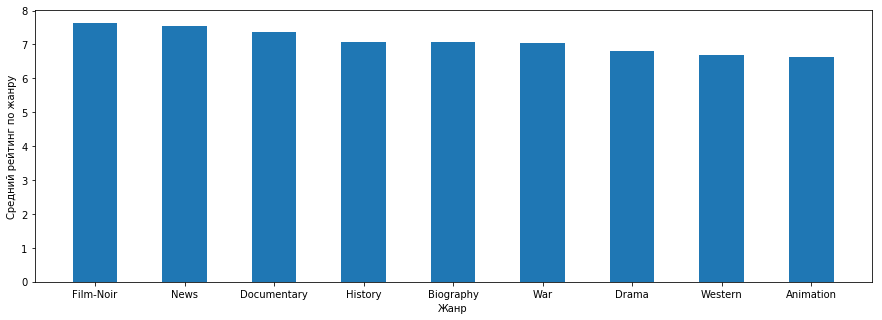

In [45]:
plt.bar(series_single_genre_score_1.index, series_single_genre_score_1.values, width = 0.5)
plt.xlabel('Жанр')
plt.ylabel('Средний рейтинг по жанру')

### Средняя продолжительность от года

In [46]:
# Заменяем пропущенные значения средними
data1['duration'] = data1['duration'].fillna(data1['duration'].mean())

In [47]:
series_duration_year = data1.groupby('title_year')['duration'].mean()
series_duration_year.head()

title_year
1916.0    123.0
1920.0    110.0
1925.0    151.0
1927.0    145.0
1929.0    105.0
Name: duration, dtype: float64

In [48]:
tot_result = lowess(series_duration_year.values, series_duration_year.index, frac=0.2)

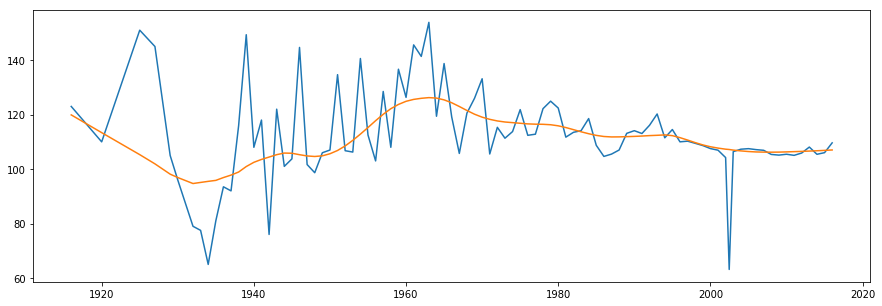

In [49]:
plt.plot(series_duration_year.index, series_duration_year.values)
plt.plot(tot_result[:,0], tot_result[:,1])

### Оценка от продолжительности

In [50]:
duration_score = (data1[['duration', 'imdb_score']])
duration_score.sort_values(['duration'], ascending=[True], inplace = True)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [51]:
duration_score.head()

,duration,imdb_score
2345,7.0,5.2
1947,7.0,8.3
4079,11.0,7.8
4673,14.0,6.2
4439,20.0,6.8


In [52]:
tot_result = lowess(duration_score.imdb_score.values, duration_score.duration.values, frac=0.1)
x_tot_smooth = tot_result[:,0]
y_tot_smooth = tot_result[:,1]

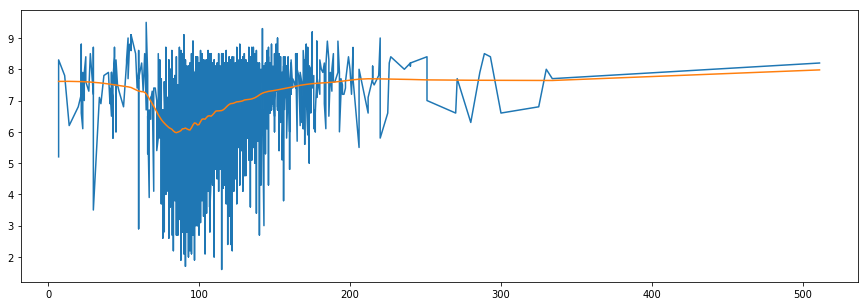

In [53]:
plt.plot(duration_score.duration.values, duration_score.imdb_score.values)
plt.plot(x_tot_smooth, y_tot_smooth)
